# Linear Regression - PyTorch

### Importing relevant libraries

In [15]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Generating Synthetic Data

We first need to generate data to train our linear regression model on.

In order to do so, `torch.arange` is called, which creates a tensor X containing a bunch of values between -5 and 5 with incremements of 0.1. This tensor is then shaped into a colomn vector, so you can think of X as a 1D vector containing all of the x co-ordinate data on the graph.

Next, a tensor called func is created by applying a linear function of y = -5x. This applies the function y = -5x all of the elements of X, which generates the corresponding y co-ordinate for each x co-ordinate.

In [16]:
# x co-ordinates of data points
X = torch.arange(-5, 5, 0.1).view(-1, 1)
# y co-ordinates of data points
func = -5 * X

#### Noise

We then add noise to the data points in func, to simulate a noisy data set.

`torch.randn(X.size())` generates random numbers from a standard normal distribution of the shape of X, and this is then scaled by 0.4 to be added to the data points.

These noise-adjusted values are stored in tensor Y.

In [17]:
#adding gaussian noise
Y = func + 0.4 * torch.randn(X.size())

### Visualising Generated Data

Now, we can use matplotlib to view our generated data.

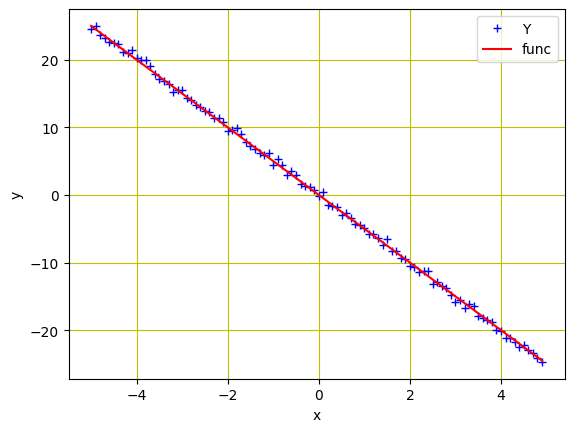

In [18]:
plt.plot(X.numpy(), Y.numpy(), 'b+', label='Y')
plt.plot(X.numpy(), func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

### Initialising Parameters

In order to begin training, we first initialise some arbitrary values for a and b, where Y = a + bX. This is so that we have a starting point to begin training the data on. `a` and `b` are initialised as torch.tensor objects with requires_grad=True to track gradients during optimisation.

In [19]:
a = torch.tensor(-20.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

### Forward Pass Function

Next we define a function called `forward(x)` which takes an input tensor `x` and computes the linear regression prediction using the parameters `a` and `b`.

In [20]:
# forward pass function for prediction
def forward(x):
    return a + b * x

### Cost Criterion Function (MSE)

In order to quantify the prediction accuracy, the mean squared error between the predicted values `y_pred` and `y` are calculated.

In [21]:
def cost_function(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

### Gradient Descent Optimisation

Here, we define some training parameters.

- learning_rate: size of the steps taken during each iteration of the process.
- costs: stores a list to calculate the MSE cost at each iteration of the training loop (which we'll see below).
- n_iter: this is the number of iterations (AKA epochs). Each epoch will involve a forward pass to compute predictions, a backward pass to calculate gradients and update parameters, and also will record the cost.

*Please note that there is a trade off between speed of convergence and stability - a lower learning rate has slower convergence but is more stable, while a higher learning rate may have faster convergence, but with the added risk of overshooting the minimum*

In [22]:
# size of steps taken in each epoch
learning_rate = 0.1
#list to store loss values at each epoch
costs = []
# number of epochs
num_epochs = 20

In [23]:
# gradient descent function

def gradient_descent(x, y, learning_rate=0.1):

    # forward pass
    Y_pred = forward(x)
    # calculate cost
    cost = cost_function(Y_pred, y)
    # backward pass
    cost.backward()
    # updating the parameters after each epoch
    b.data = b.data - learning_rate * b.grad.data
    a.data = a.data - learning_rate * a.grad.data

    return cost

### Training Loop

This is where the values of a and b are iterativly adjusted so as to reduce the average mean squared error.

In [24]:
for i in range (num_epochs):

    # making predictions with forward pass
    Y_pred = forward(X)

    # Gradient Descent
    cost = gradient_descent(X, Y, learning_rate)

    costs.append(cost)

    # zeroing gradients after each epoch
    b.grad.data.zero_()
    a.grad.data.zero_()

    print('{}, \t{}, \t{}, \t{}'.format(i, cost.item(), b.item(), a.item()))


0, 	596.75732421875, 	-1.9022111892700195, 	-16.04962158203125
1, 	343.92791748046875, 	-7.263931751251221, 	-12.808341026306152
2, 	203.2471923828125, 	-3.6552510261535645, 	-10.268933296203613
3, 	122.61090087890625, 	-6.036847114562988, 	-8.20132064819336
4, 	75.18423461914062, 	-4.427646636962891, 	-6.571046352386475
5, 	46.69017028808594, 	-5.484680652618408, 	-5.250734806060791
6, 	29.28038787841797, 	-4.766435623168945, 	-4.205056190490723
7, 	18.505352020263672, 	-5.235048294067383, 	-3.361330509185791
8, 	11.7724027633667, 	-4.914046287536621, 	-2.6910362243652344
9, 	7.535672664642334, 	-5.1214518547058105, 	-2.1515908241271973
10, 	4.856224060058594, 	-4.977717876434326, 	-1.7221084833145142
11, 	3.155557870864868, 	-5.06929349899292, 	-1.3770852088928223
12, 	2.0733842849731445, 	-5.004762649536133, 	-1.1019823551177979
13, 	1.383541464805603, 	-5.045053482055664, 	-0.8812547922134399
14, 	0.9432420134544373, 	-5.015972137451172, 	-0.7050756216049194
15, 	0.6619701385498047

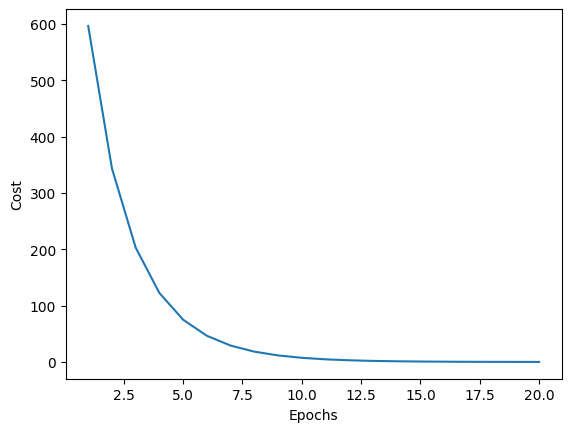

In [25]:
plt.xlabel('Epochs')
plt.ylabel('Cost')

epochs = list(range(1, num_epochs + 1))
costs_np = [cost.detach().numpy() for cost in costs]
plt.plot(epochs, costs_np)

# Extension - Linear Regression - From Scratch

Let's take a more realistic example, where we have a dataset of multiple features and we want to predict the target variable.



## Load in necessary csv files

- If writing local code, no need to do this step

If on Colab, download advertising.csv (in the content directory) and upload it to the current directory by:
Clicking on Files icon (on the left side bar of the screen) -> Upload to session storage -> Select the file from your local machine

In [26]:
# variables to store mean and std for each feature
mu = []
std = []

# Function to Normalise the data
def normalise(data):    
	for i in range(0,data.shape[1]-1):
		data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))
		mu.append(np.mean(data[:,i]))
		std.append(np.std(data[:, i]))

In [40]:
def load_data(filename="/content/advertising.csv"):
    df = pd.read_csv(filename, sep=",", index_col=False)
    # show the first 5 rows of the data
    print(df.head())
    data = np.array(df, dtype=float)
    plot_TV_sales_data(data[:,:3], data[:, -1])
    normalise(data)
    return data[:,:3], data[:, -1]

def plot_TV_sales_data(x, y):
	plt.xlabel('TV')
	plt.ylabel('sales')
	plt.plot(x[:,0], y, 'bo')
	plt.show()

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


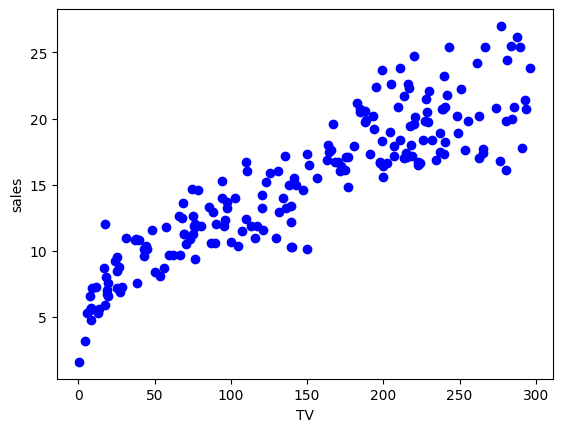

In [41]:
# load data and show some values as pd dataframe
# x,y = load_data()
# run this instead if local machine
x,y = load_data("./content/advertising.csv")


In [42]:
# we have to add a column of ones to the input data - because we have a bias term
x = np.hstack([np.ones((x.shape[0], 1)), x])

# initialize the weights
a_b = np.zeros((x.shape[1], 1))

In [43]:
# re-define the forward pass function using matrix multiplication
def forward(x, a_b):
    return np.matmul(x, a_b)

# re-define the cost function using matrix operations
def cost_function(x, y, a_b):
    return ((forward(x, a_b)-y).T@(forward(x, a_b)-y))/(2*y.shape[0])

In [49]:
# re define gradient Descent

def gradient_descent(x, y, a_b, learning_rate=0.1):
    # get m - the number of data points
    m = x.shape[0]

    # calculate the forward pass
    forward_x = forward(x, a_b)

    # calculate the cost
    cost = cost_function(x, y, a_b)

    # calculate the derivative of the cost function
    cost_ = (1/m)*(x.T@(forward_x - y))

    # update the parameters
    a_b = a_b - (learning_rate)*cost_


    return a_b, cost

In [55]:
# The Training Loop

cost_all = []
learning_rate = 0.1
num_epochs = 100

for i in range(num_epochs):
    # calculate cost
    a_b, cost = gradient_descent(x, y, a_b, learning_rate)

    # append cost to list
    cost_all.append(cost)
    
    if i % 10 == 0:
        print('{}, \t{}'.format(i, cost[0][0]))


0, 	1.2155092034939163e-16
10, 	1.4777752394689264e-17
20, 	1.7966297064490454e-18
30, 	2.184277192770219e-19
40, 	2.655531373230076e-20
50, 	3.2287708357989966e-21
60, 	3.9246774143476706e-22
70, 	4.7726084765871214e-23
80, 	5.804003089396523e-24
90, 	7.040173371426815e-25


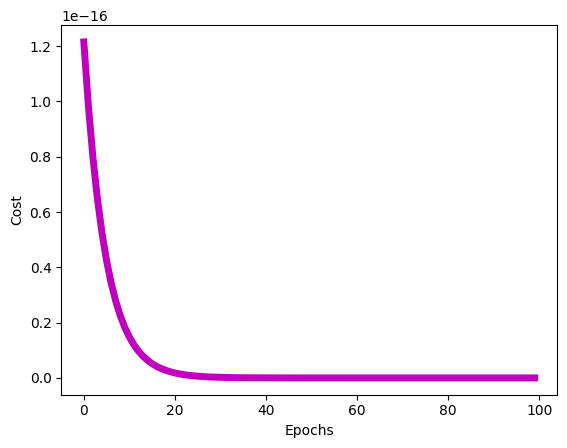

In [56]:
# for testing and plotting cost

def plot_cost(cost_all, num_epochs):
	plt.xlabel('Epochs')
	plt.ylabel('Cost')
	plt.plot(num_epochs, cost_all, 'm', linewidth = "5")
	plt.show()

n_epochs = []
costplot = []
count = 0
for i in cost_all:
	costplot.append(i[0][0])
	n_epochs.append(count)
	count += 1
costplot = np.array(costplot)
n_epochs = np.array(n_epochs)
plot_cost(costplot, n_epochs)
